


#تمرین L1 و L2
#KianAra

In [ ]:
import pandas as pd

mainData = pd.read_csv('/content/weatherHistory.csv')
mainData.head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.


In [ ]:
print(mainData.shape)
mainData.isnull().sum()

(96453, 12)


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
mainData.fillna(method="bfill" , inplace=True)
mainData.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

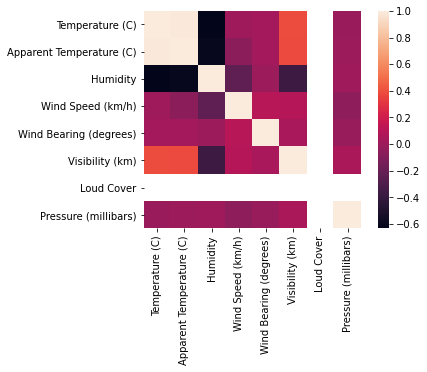

In [ ]:
import seaborn as sns

sns.heatmap(mainData.corr(), vmax=1, square=True)

In [ ]:
mainData['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [ ]:
mainData['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mainData['Summary'] = le.fit_transform(mainData['Summary'])
mainData['Summary'].value_counts()

19    31733
17    28094
18    16597
6     10890
12     7148
4       528
3       516
5       386
11       86
26       67
16       63
0        54
25       45
13       40
8        39
24       35
2        35
9        34
15       17
10       14
20       10
21        8
14        7
23        4
7         1
22        1
1         1
Name: Summary, dtype: int64

In [ ]:
mainData.drop(["Formatted Date","Summary","Daily Summary",
         "Precip Type","Loud Cover","Apparent Temperature (C)"],
        axis=1,inplace=True)
mainData

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
X = mainData.loc[:, mainData.columns != 'Temperature (C)']
y = mainData.loc[:, mainData.columns == 'Temperature (C)']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD, PCA

sc = StandardScaler().fit_transform(X)
X = pd.DataFrame(sc)

#X = TruncatedSVD(n_components=4).fit_transform(X)
#X = PCA(n_components=4).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import numpy as np

linear_model = LinearRegression().fit(X_train, y_train)
print('Linear Regression : %.3f' % linear_model.score(X_test, y_test))

lasso_model001 = Lasso(alpha=0.001).fit(X_train,y_train)
print('\nLasso Regression (0.001) : %.3f' % lasso_model001.score(X_test, y_test))
lasso_model1 = Lasso(alpha=1).fit(X_train,y_train)
print('Lasso Regression (1) : %.3f' % lasso_model1.score(X_test, y_test))
ridge_model001 = Ridge(alpha=0.0001).fit(X_train,y_train)
print('\nRidge Regression (0.001) : %.3f' % ridge_model001.score(X_test, y_test))
ridge_model1 = Ridge(alpha=1).fit(X_train,y_train)
print('Ridge Regression (1) : %.3f' % ridge_model1.score(X_test, y_test))

Linear Regression : 0.457

Lasso Regression (0.001) : 0.457
Lasso Regression (1) : 0.418

Ridge Regression (0.001) : 0.457
Ridge Regression (1) : 0.457


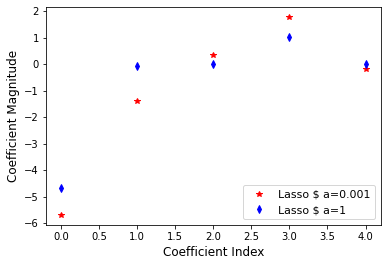

In [ ]:
import matplotlib.pyplot as plt

#plt.plot(linear_model.coef_, linestyle= 'none', marker= 'h', markersize=5, color='cyan', label='Linear Reg')
plt.plot(lasso_model001.coef_, linestyle= 'none', marker= '*', markersize=6, color='red', label='Lasso $ a=0.001')
plt.plot(lasso_model1.coef_, linestyle= 'none', marker= 'd', markersize=5, color='blue', label='Lasso $ a=1')
#plt.plot(ridge_model001.coef_, linestyle= 'none', marker= 'o', markersize=5, color='green', label='Ridge $ a=0.001')
#plt.plot(ridge_model1.coef_, linestyle= 'none', marker= '^', markersize=5, color='gray', label='Ridge $ a=1')

plt.xlabel('Coefficient Index', fontsize=12)
plt.ylabel('Coefficient Magnitude', fontsize=12)
plt.legend(fontsize=11, loc=4)
plt.show()